In [1]:
from utils import *
import os
import json

In [2]:
# from batch ID to the corresponding sample IDs
skip_samples = {
    5: range(40, 50), 
    10: range(10,20),
    12: range(20, 30), 
    15: range(40, 50)
}

annotator_list = {
    7: ['yujia', 'manveer'],
    8: ['miaoran', 'chenyu'],
    # 11: ['rogger', 'matt'] #'yujia',
}

exclude_batch = [11,13,16]

In [3]:
result_path = 'batch_5_src_no_sports/results'
result_files = []
skip_sample_ids = {}
selected_annotators = {}
for batch_id in range(1,16+1):
    if batch_id in exclude_batch:
        continue
    file_name = os.path.join(result_path, f"batch_{batch_id}_annotation.json")
    result_files.append(file_name)
    if batch_id in skip_samples:
        skip_sample_ids[file_name] = skip_samples[batch_id]
    if batch_id in annotator_list:
        selected_annotators[file_name] = annotator_list[batch_id]
# result_files = [os.path.join(result_path, f"batch_{batch_id}_annotation.json") for batch_id in range(1,10)]
# skip_sample_ids = {os.path.join(result_path, "batch_5_annotation.json"): list(range(40,50))}
# selected_annotators = {
#         # os.path.join(result_path, "batch_3_annotation.json"): ['yujia', 'rogger'],
#         os.path.join(result_path, "batch_7_annotation.json"): ['yujia', 'manveer']
# }
detector_eval = DetectorEvaluator(result_files, skip_sample_ids=skip_sample_ids, selected_annotators=selected_annotators, halu_labels=['Unwanted', 'Questionable', 'Benign'])
detector_eval.process_results()

(610, 14)


/home/miaoran/FaithBench/assign/utils.py:207: RuntimeWarning: invalid value encountered in cast
  detector_pred = row[f"{detector}"].astype(int)


In [4]:
detector_eval.compute_correlation('pearson')

,human,HHEMv1,HHEM-2.1,HHEM-2.1-English,HHEM-2.1-Open,trueteacher,true_nli,gpt-3.5-turbo,gpt-4-turbo,gpt-4o,gpt-4,minicheck-roberta-large,minicheck-deberta-v3-large,minicheck-flan-t5-large
human,1.000000,0.061056,0.144440,0.111223,0.049582,0.093284,0.090819,-0.157918,0.152292,0.130771,0.108192,0.098087,0.085714,0.022907
HHEMv1,0.061056,1.000000,-0.008725,-0.030284,-0.075258,-0.064058,0.034593,-0.176963,-0.117073,-0.107825,-0.020981,0.102926,0.131588,0.096351
HHEM-2.1,0.144440,-0.008725,1.000000,0.528343,0.345264,0.285516,0.170923,0.015287,0.127446,0.101087,0.215061,0.140171,0.113470,0.150377
HHEM-2.1-English,0.111223,-0.030284,0.528343,1.000000,0.236287,0.193493,0.098660,-0.047530,0.082604,0.097166,0.146553,0.024664,0.095139,0.176972
HHEM-2.1-Open,0.049582,-0.075258,0.345264,0.236287,1.000000,0.168775,0.033540,-0.067225,0.037529,0.045043,0.061885,0.046129,0.109502,0.185767
trueteacher,0.093284,-0.064058,0.285516,0.193493,0.168775,1.000000,0.236035,0.143892,0.175341,0.165713,0.242135,0.118509,0.104714,0.090969
true_nli,0.090819,0.034593,0.170923,0.098660,0.033540,0.236035,1.000000,0.110344,0.155819,0.152173,0.216134,0.099899,0.076220,0.030866
gpt-3.5-turbo,-0.157918,-0.176963,0.015287,-0.047530,-0.067225,0.143892,0.110344,1.000000,0.161441,0.125441,0.142660,0.071815,0.008085,0.207933
gpt-4-turbo,0.152292,-0.117073,0.127446,0.082604,0.037529,0.175341,0.155819,0.161441,1.000000,0.539531,0.459069,0.060782,0.046199,0.077378
gpt-4o,0.130771,-0.107825,0.101087,0.097166,0.045043,0.165713,0.152173,0.125441,0.539531,1.000000,0.499112,0.003541,0.020438,0.054798


In [5]:
detector_eval.compute_correlation('spearman')

,human,HHEMv1,HHEM-2.1,HHEM-2.1-English,HHEM-2.1-Open,trueteacher,true_nli,gpt-3.5-turbo,gpt-4-turbo,gpt-4o,gpt-4,minicheck-roberta-large,minicheck-deberta-v3-large,minicheck-flan-t5-large
human,1.000000,0.061056,0.144440,0.111223,0.049582,0.093284,0.090819,-0.157918,0.152292,0.130771,0.108192,0.098087,0.085714,0.022907
HHEMv1,0.061056,1.000000,-0.008725,-0.030284,-0.075258,-0.064058,0.034593,-0.176963,-0.117073,-0.107825,-0.020981,0.102926,0.131588,0.096351
HHEM-2.1,0.144440,-0.008725,1.000000,0.528343,0.345264,0.285516,0.170923,0.015287,0.127446,0.101087,0.215061,0.140171,0.113470,0.150377
HHEM-2.1-English,0.111223,-0.030284,0.528343,1.000000,0.236287,0.193493,0.098660,-0.047530,0.082604,0.097166,0.146553,0.024664,0.095139,0.176972
HHEM-2.1-Open,0.049582,-0.075258,0.345264,0.236287,1.000000,0.168775,0.033540,-0.067225,0.037529,0.045043,0.061885,0.046129,0.109502,0.185767
trueteacher,0.093284,-0.064058,0.285516,0.193493,0.168775,1.000000,0.236035,0.143892,0.175341,0.165713,0.242135,0.118509,0.104714,0.090969
true_nli,0.090819,0.034593,0.170923,0.098660,0.033540,0.236035,1.000000,0.110344,0.155819,0.152173,0.216134,0.099899,0.076220,0.030866
gpt-3.5-turbo,-0.157918,-0.176963,0.015287,-0.047530,-0.067225,0.143892,0.110344,1.000000,0.161441,0.125441,0.142660,0.071815,0.008085,0.207933
gpt-4-turbo,0.152292,-0.117073,0.127446,0.082604,0.037529,0.175341,0.155819,0.161441,1.000000,0.539531,0.459069,0.060782,0.046199,0.077378
gpt-4o,0.130771,-0.107825,0.101087,0.097166,0.045043,0.165713,0.152173,0.125441,0.539531,1.000000,0.499112,0.003541,0.020438,0.054798


In [6]:
detector_eval.compute_performance()

,ba,f1-macro
HHEM-1,53.24,40.53
HHEM-2.1-Tri,55.90,34.49
HHEM-2.1-English,53.63,28.87
HHEM-2.1-Open,51.51,26.42
True-Teacher,53.76,32.60
True-NLI,51.71,22.72
"GPT-3.5-Turbo, zero-shot",41.77,31.57
"GPT-4-Turbo, zero-shot",56.52,36.00
"GPT-4o, zero-shot",55.15,33.18
"GPT-4, zero-shot",53.05,26.64


In [7]:
print(detector_eval.compute_performance().to_latex(float_format="{:.2f}".format,))

\begin{tabular}{lrr}
\toprule
 & ba & f1-macro \\
\midrule
HHEM-1 & 53.24 & 40.53 \\
HHEM-2.1-Tri & 55.90 & 34.49 \\
HHEM-2.1-English & 53.63 & 28.87 \\
HHEM-2.1-Open & 51.51 & 26.42 \\
True-Teacher & 53.76 & 32.60 \\
True-NLI & 51.71 & 22.72 \\
GPT-3.5-Turbo, zero-shot & 41.77 & 31.57 \\
GPT-4-Turbo, zero-shot & 56.52 & 36.00 \\
GPT-4o, zero-shot & 55.15 & 33.18 \\
GPT-4, zero-shot & 53.05 & 26.64 \\
Minicheck-Roberta-LG & 55.79 & 50.91 \\
Minicheck-Deberta-LG & 54.81 & 53.44 \\
Minicheck-Flan-T5-LG & 51.35 & 48.05 \\
\bottomrule
\end{tabular}



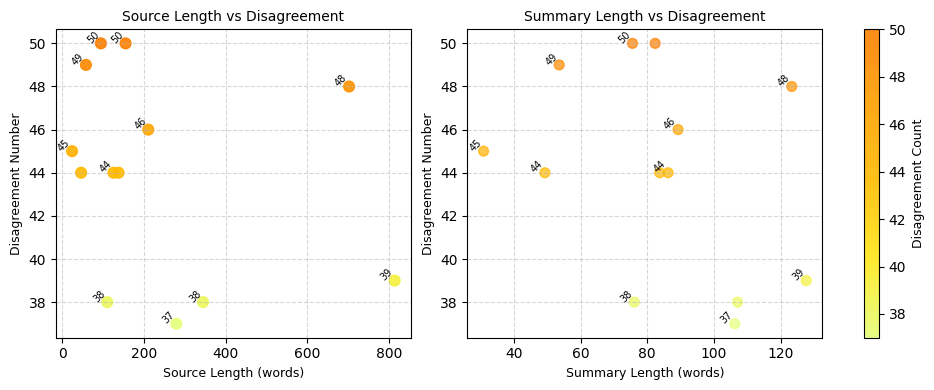

In [8]:
detector_eval.disagree_vs_length()

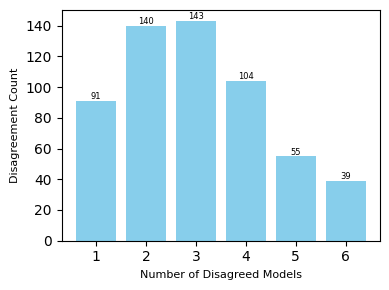

In [9]:
detector_eval.disagree_vs_model()